# Project 2 by Hsin Chen
### Partners: Ashley Chang, Rose Garay

# Part 1

In [857]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem 1
Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). After I performed queries on the databases, I dealt with missing data by joining the two tables where the pair of team and year both exist.

In [858]:
# Connect to the database
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Make a query from the Salaries table
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries \
WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"

# Make a query from the Teams table
win_rate_query = "SELECT teamID, yearID, W as wins, G as games, \
CAST(W AS FLOAT)*100 / (G) as win_percentage, franchID FROM teams \
WHERE yearID >= 1990 GROUP BY teamID, yearID ORDER BY teamID"

# Create the data frames with the queries 
team_salaries = pd.read_sql(salary_query, conn)
team_win_rate = pd.read_sql(win_rate_query, conn)

# Merge the data frames only on the existed teams and years they played
join = team_salaries.merge(team_win_rate, how = "inner", \
                           left_on = ["teamID", "yearID"], right_on = ["teamID", "yearID"])

join

,teamID,yearID,total_payroll,wins,games,win_percentage,franchID
0,ANA,1997,31135472.0,84,162,51.851852,ANA
1,ANA,1998,41281000.0,85,162,52.469136,ANA
2,ANA,1999,55388166.0,70,162,43.209877,ANA
3,ANA,2000,51464167.0,82,162,50.617284,ANA
4,ANA,2001,47535167.0,75,162,46.296296,ANA
5,ANA,2002,61721667.0,99,162,61.111111,ANA
6,ANA,2003,79031667.0,77,162,47.530864,ANA
7,ANA,2004,100534667.0,92,162,56.790123,ANA
8,ARI,1998,32347000.0,65,162,40.123457,ARI
9,ARI,1999,68703999.0,100,162,61.728395,ARI


# Part 2

### Problem 2
Produce a plot that illustrate the distribution of payrolls across all teams conditioned on time (from 1990-2014) with each team representing a line in the line graph. The sections of some of the lines that stay flat at 0 imply that those teams did not play during that certain period of time.

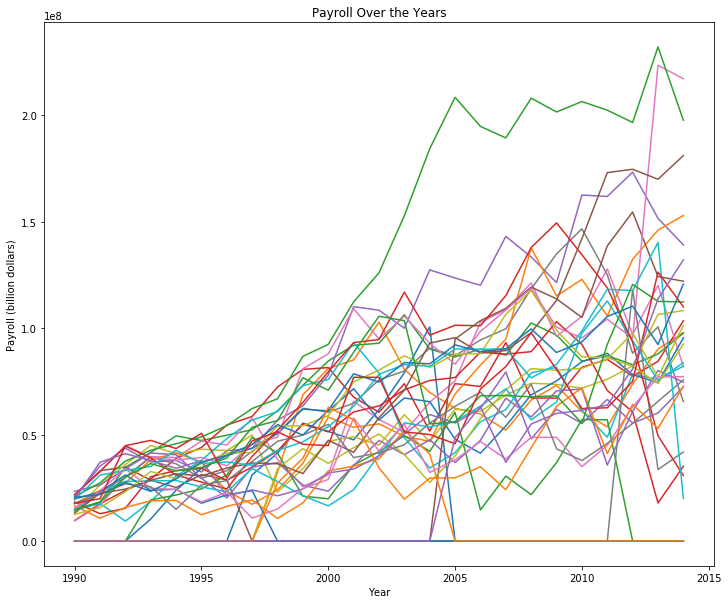

In [859]:
# Get a list of teams as an arrays
teams = np.unique(join.iloc[:,0].values)

# Create a data frame of just the years in the right range
years = np.arange(1990, 2015)
years_table = pd.DataFrame(columns = ['yearID'], data = years)

# Create an empty hash
d = {}

# Create x, y axis and title of graph
plt.figure(figsize = (12, 10))
plt.title("Payroll Over the Years")
plt.xlabel("Year")
plt.ylabel("Payroll (billion dollars)")

# For every team in the array:
for t in teams:
    
    # Extract the current team data from the entire table
    plot_table = join.drop(join[t != join['teamID']].index)
    
    # Extracing the current team and the relevant data related to it
    relation = join[['yearID','teamID','total_payroll']].groupby(['teamID']).get_group(t)
    
    # Insert the data into the hash and plot on the graph
    d[t] = years_table.merge(relation, how = 'left', left_on = ['yearID'], right_on = ['yearID'])
    plt.plot(d[t]['yearID'], d[t]['total_payroll'].fillna(value=0))

plt.show()

### Question 1
There seems to be a trend for payrolls to increase over time for each team. There are some teams whose payrolls drop in recent years but the general trend is increasing over time. We could analyze central tendency and mean of payroll over time with this observation. The spread of the teams' salaries also increases over time and the range of payroll from 1990 to 2014 is drastic.

### Problem 3
Produce a bar plot that shows the staement made in question 1: there is a trend for payrolls to increase over time.

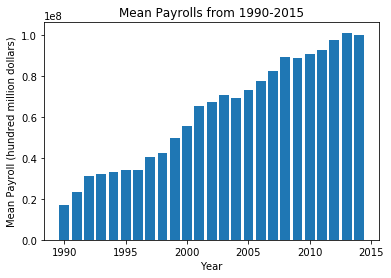

In [860]:
# Calculate the mean payroll for each year
mean_table = join[['yearID','total_payroll']]
mean_payroll = (mean_table.groupby('yearID')).mean()

# Make the plot
plt.title("Mean Payrolls from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Mean Payroll (hundred million dollars)")
plt.bar(mean_payroll.index, mean_payroll['total_payroll'])
plt.show()

### Problem 4
Discretize year into five time periods and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods with a regression line in each graph.

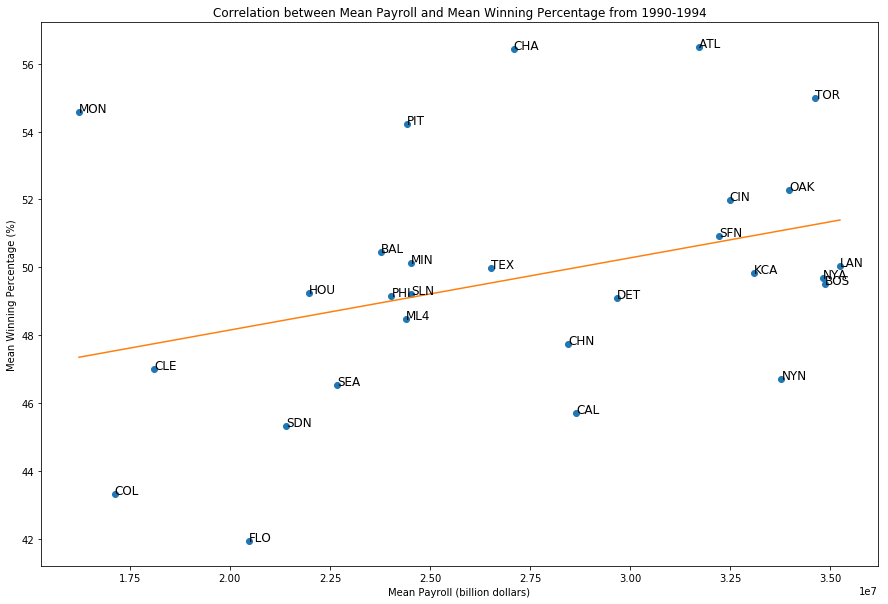

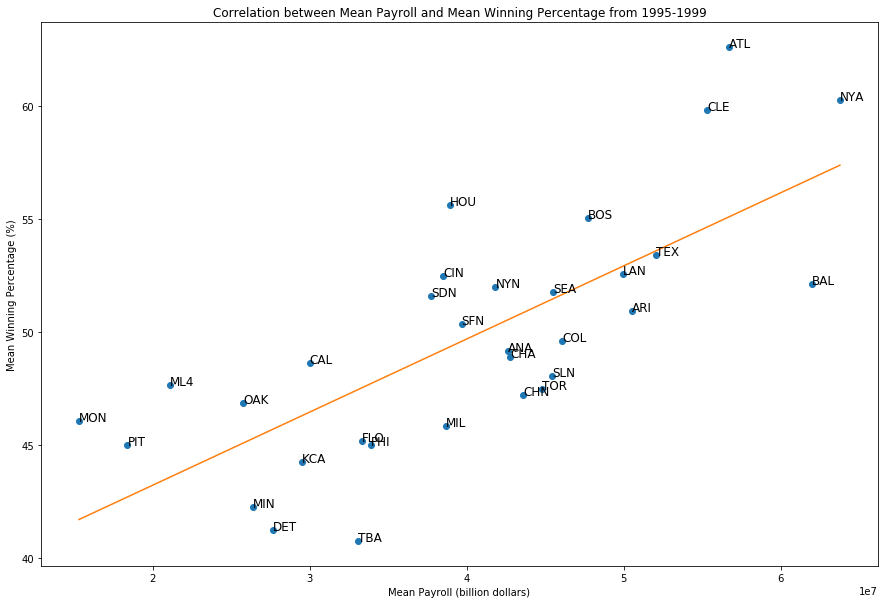

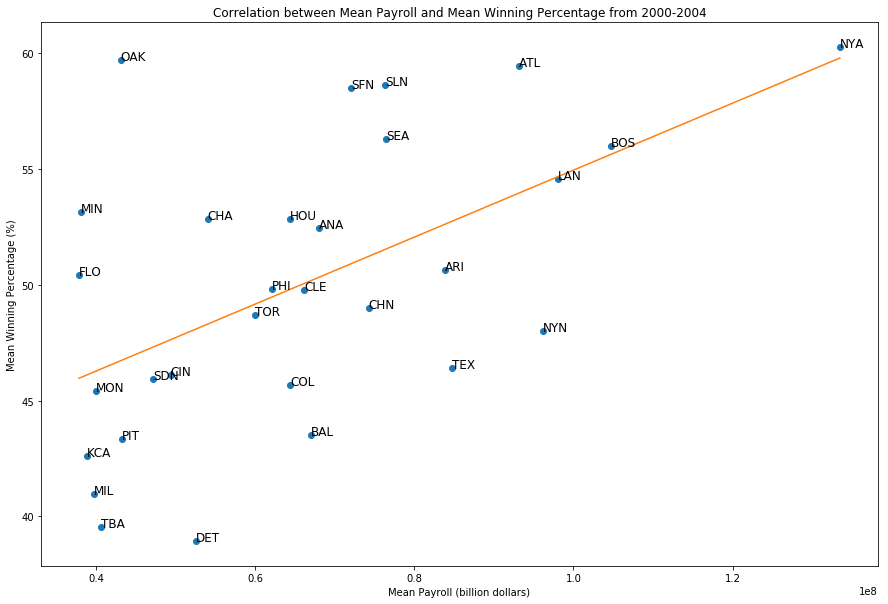

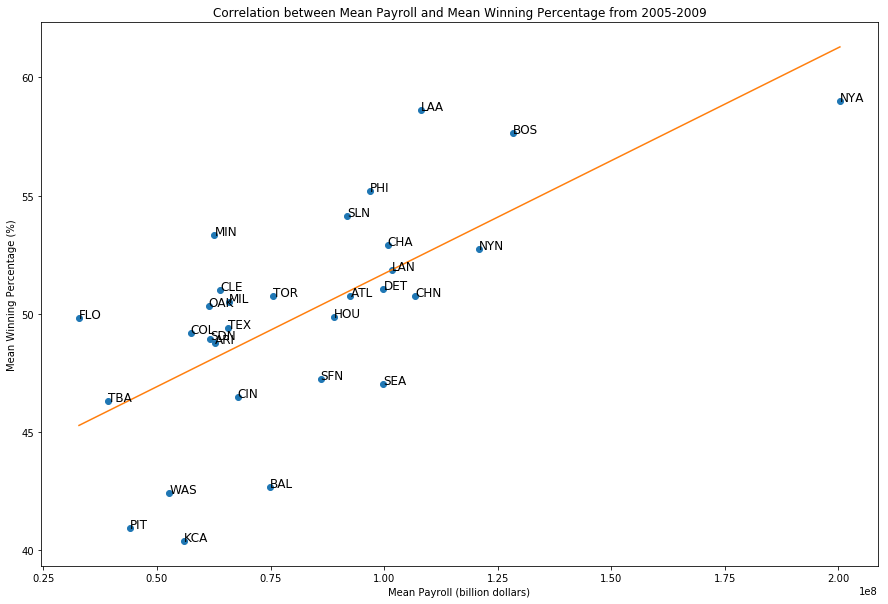

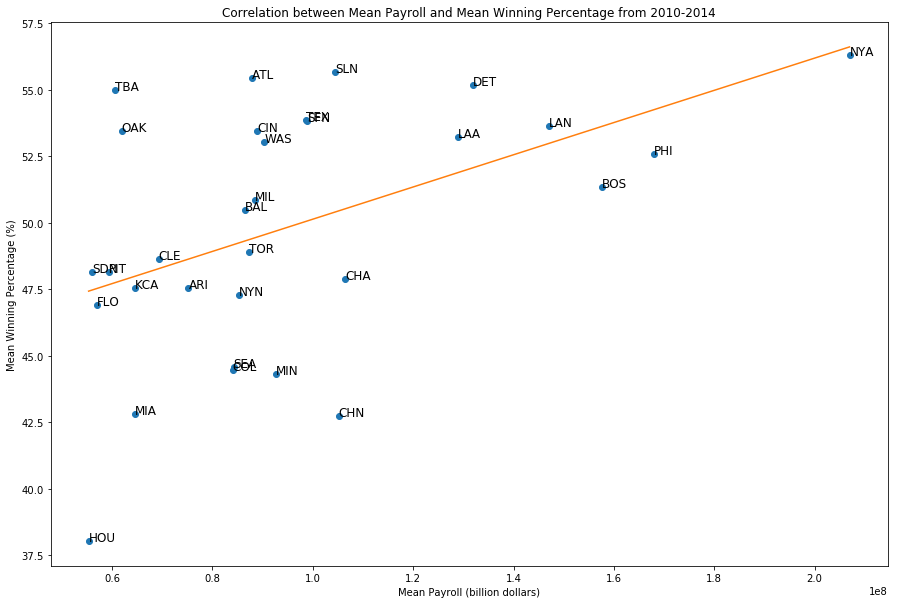

In [861]:
# Create an array of teams
teams = np.unique(join.iloc[:,0].values)

# Create a data frame of years (1990-2014)
years = np.arange(1990, 2015)
years_table = pd.DataFrame(columns = ['yearID'], data = years)

# Merging the orginal data frame with selected columns and the year data frame to 
# get a new data frame ordered by year
table = join[['yearID','teamID','total_payroll','wins','games']]
table = years_table.merge(table, how = "left", left_on = ['yearID'], right_on = ['yearID'])

# Adding a new column to the data frame that specifies the time period of each row
periods = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014']
table['time_period'] = pd.cut(temp_table['yearID'], right = False, bins = 5, labels = periods)

# Make a graph for every period
for p in periods:
    
    # Extract data with the current time period
    compare_table = table.drop(table[p != table['time_period']].index)
    
    # Compute the mean payroll for each team in that particular time period
    mean_payroll = (compare_table.groupby(['teamID']))['total_payroll'].mean()

    # Compute the mean win rate for each team in that particular time period
    compare_table['win_rate'] = (100*compare_table['wins']) / (compare_table['games'])
    mean_win = (compare_table.groupby(['teamID']))['win_rate'].mean()
    
    # Convert Series objects to DataFrames
    payroll = mean_payroll.to_frame()
    win = mean_win.to_frame()
    
    # Reorganize the data frames' columns and merge them on teamID
    # Make index (teamID) a column
    payroll['teamID'] = payroll.index
    win['teamID'] = win.index
    final_table = payroll.merge(win, how = 'inner', left_on = ['teamID'], right_on = ['teamID'])
    final_table.columns = ['mean_payroll', 'teamID', 'mean_win_rate']
    
    # Plot the graph
    x_data = final_table['mean_payroll'].values
    y_data = final_table['mean_win_rate'].values
    z = np.polyfit(x = x_data, y = y_data, deg=1)
    f = np.poly1d(z)
    x_new = np.linspace(x_data.min(), x_data.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(15,10))
    plt.plot(x_data, y_data,'o', x_new, y_new)
    
    # Specify the team name for each point on the graph
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_data[i], y_data[i]), size = 12)
    
    plt.title("Correlation between Mean Payroll and Mean Winning Percentage from " + p)
    plt.xlabel("Mean Payroll (billion dollars)")
    plt.ylabel("Mean Winning Percentage (%)")
    plt.show()

### Question 2
There is a general trend that the higher the mean payroll, the higher the mean winning percentage. The line in each graph helps us see such trend more clearly. The New York Yankees (NYA) and the Boston Red Sox (BOS) in particular tend to spend more for wins, although their spending efficiency are not as good in the last ten years (spending a lot but not winning as much). The Oakland A (OAK), on the other hand, is a great example of high spending efficiency. It started out spending a lot and over the years, it has obtained a high winning percentage while spending very little compared to the rest of the teams in each time period. We can visualize the spending efficiency better by observing the relationship between each point (team) with the line (average spending and winning ratio). If the points are placed above the line, they tend to have a good spending efficiency, while the points placed below the line do not.

# Part 3

### Problem 5
Create a new column that standardizes payroll conditioned on year, which is the average payroll in each year subtracted by the payroll of each team in each year and divided by the standard deviation of payroll in each year.

In [862]:
# Calculate the mean and standard deviation of payrolls each year
avg_payroll = (table.groupby(['yearID']))['total_payroll'].mean()
std_payroll = (table.groupby(['yearID']))['total_payroll'].std()

# Convert Series objects into data frame objects
avg_payroll = avg_payroll.to_frame()
s_payroll = std_payroll.to_frame()

# Reorganize indexing
avg_payroll['yearID'] = avg_payroll.index
s_payroll['yearID'] = std_payroll.index

# Merge the two data frames on year, so the result is average and standard deviation of payrolls each year
avg_s = avg_payroll.merge(s_payroll, how = 'inner', left_on = ['yearID'], right_on = ['yearID'])
avg_s.columns = ['avg_payroll', 'yearID', 's_payroll']

# Select columns needed to calculate the standardized payroll from the original table
payroll = table[['yearID', 'teamID', 'total_payroll', 'time_period']].copy()

# Iterate through both tables
payroll['std_payroll'] = 0.0
for i1, row1 in payroll.iterrows():
    for i2, row2 in avg_s.iterrows():
        
        # Check if year matches
        if (row1['yearID'] == row2['yearID']):
            
            # Calculate the standardized payroll and insert the value into the table
            a = avg_s['avg_payroll'][i2]
            s = avg_s['s_payroll'][i2]
            payroll.set_value(i1, 'std_payroll', (payroll['total_payroll'][i1] - a) / s)

# Reorganize and sort the table by year
payroll.sort_values(by = ['yearID', 'teamID'], inplace = True)
payroll = payroll.reset_index().drop('index', 1)
payroll = payroll[['yearID', 'teamID', 'total_payroll', 'std_payroll', 'time_period']]
payroll

,yearID,teamID,total_payroll,std_payroll,time_period
0,1990,ATL,14555501.0,-0.667275,1990-1994
1,1990,BAL,9680084.0,-1.959861,1990-1994
2,1990,BOS,20558333.0,0.924213,1990-1994
3,1990,CAL,21720000.0,1.232198,1990-1994
4,1990,CHA,9491500.0,-2.009859,1990-1994
5,1990,CHN,13624000.0,-0.914238,1990-1994
6,1990,CIN,14370000.0,-0.716456,1990-1994
7,1990,CLE,14487000.0,-0.685437,1990-1994
8,1990,DET,17593238.0,0.138098,1990-1994
9,1990,HOU,18330000.0,0.333431,1990-1994


### Problem 6
Discretize year into five time periods again and then make a scatterplot showing mean winning percentage (y-axis) vs. the mean standardized payroll (x-axis) for each of the five time periods with a regression line in each graph.

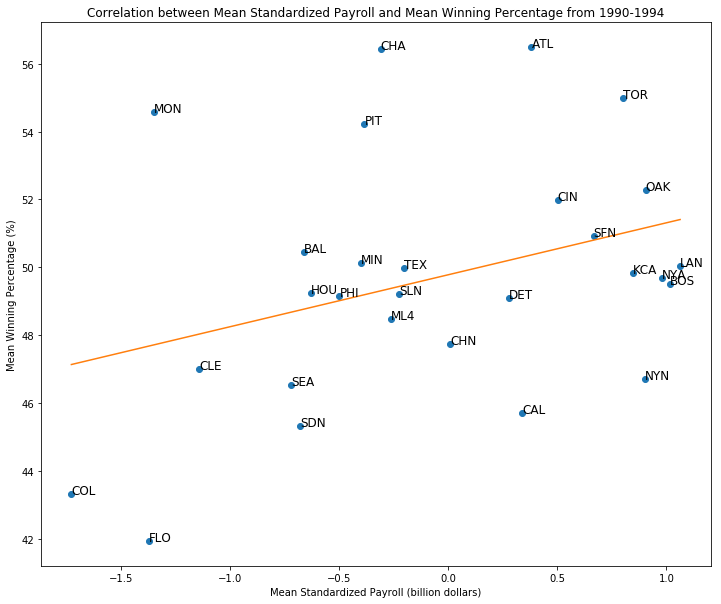

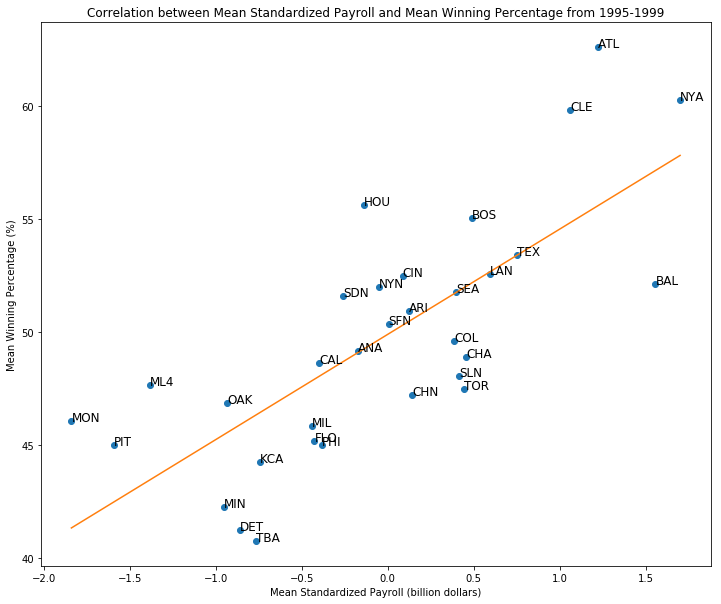

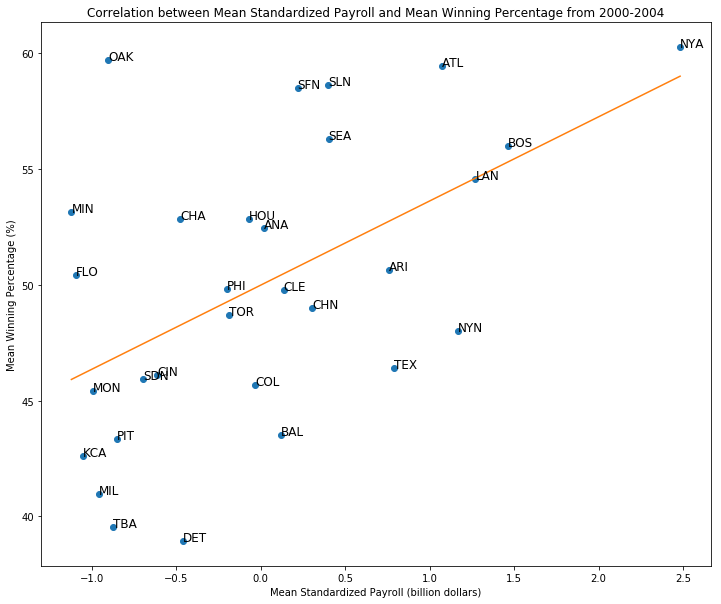

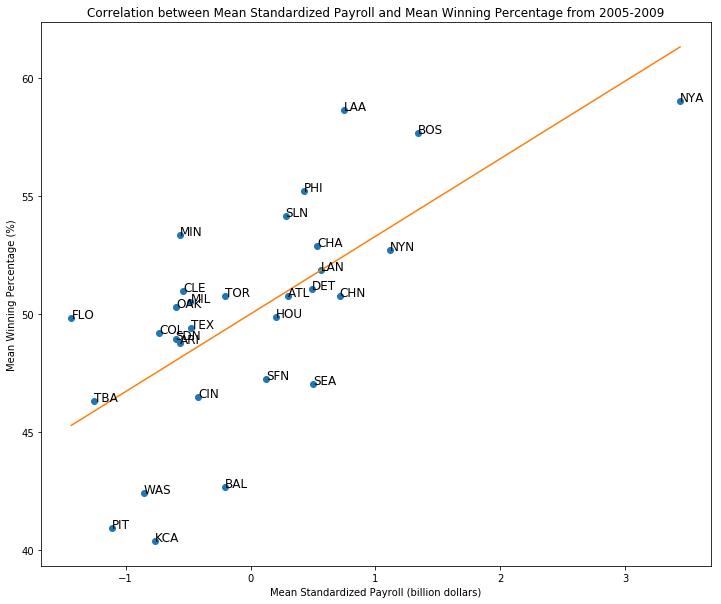

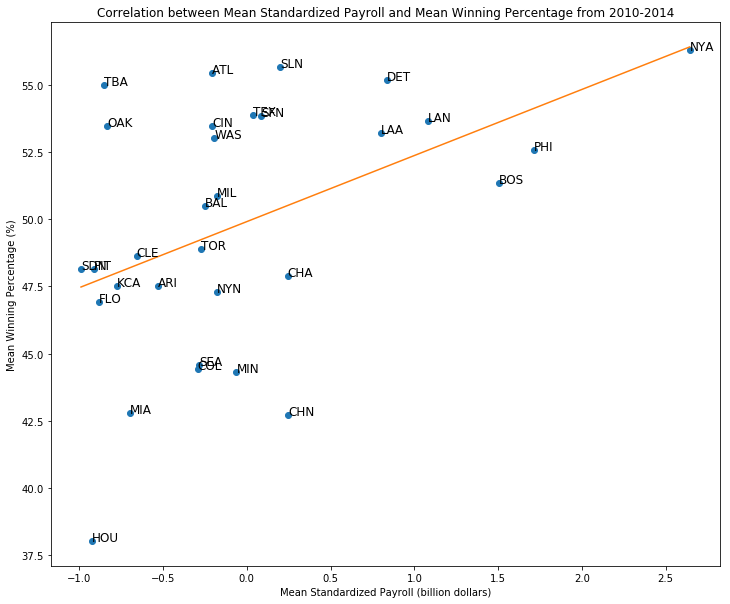

In [863]:
table['std_payroll'] = payroll['std_payroll'].values

# Make a graph for every period
for p in periods:
    
    # Extract data with the current time period
    compare_table = table.drop(table[p != table['time_period']].index)
    
    mean_std = (compare_table.groupby(['teamID']))['std_payroll'].mean()
    #print(std)

    # Compute the mean win rate for each team in that particular time period
    compare_table['win_rate'] = (100*compare_table['wins']) / (compare_table['games'])
    mean_win = (compare_table.groupby(['teamID']))['win_rate'].mean()
    
    # Convert Series objects to DataFrames
    std = mean_std.to_frame()
    win = mean_win.to_frame()
    
    # Reorganize the data frames' columns and merge them on teamID
    win['teamID'] = win.index
    win.columns = ['mean_win_rate', 'teamID']
    std['teamID'] = std.index
    std.columns = ['mean_std_pay', 'teamID']
    final_table = std.merge(win, how = 'inner', left_on = ['teamID'], right_on = ['teamID'])
    
    # Make the plot
    x_vals = final_table['mean_std_pay'].values
    y_vals = final_table['mean_win_rate'].values

    z = np.polyfit(x = x_vals, y = y_vals, deg=1)
    f = np.poly1d(z)
    x_new = np.linspace(x_vals.min(), x_vals.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(12,10))
    plt.plot(x_vals, y_vals,'o', x_new, y_new)
    
    # Specify the team name for each point on the graph
    for i, txt in enumerate(final_table['teamID']):
        plt.annotate(txt, (x_vals[i], y_vals[i]), size = 12)
    
    plt.title("Correlation between Mean Standardized Payroll and Mean Winning Percentage from " + p)
    plt.xlabel("Mean Standardized Payroll (billion dollars)")
    plt.ylabel("Mean Winning Percentage (%)")
    plt.show()

### Question 3
Our plots from problem 4 and problem 6 are almost the same in terms of the increasing trend and the scatter of the data are both similar in every time period. The most noticeable difference between the two graphs, however, are the scales of the x-axes. The mean payroll for problem 4's graph is always positive, while the standardized payroll in problem 6's graph ranges from -3 to 3. Problem 4's graph makes it easier for us to see the actual mean payrolls, but difficult to compare the scatterplots to with one another. Problem 6's graph, on the other hand, makes it easier for us to compare the scatterplots of different time periods; in other words, we could observe how many standard deviations away from the mean payroll each team's payroll is. A positive standard deviation implies that the team's payroll lies above the mean payroll, while a negative standard deviation suggests the team's payoll lies below the mean payroll.

### Problem 7
Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis) from 1990 to 2014. Add a regression line to highlight the relationship.

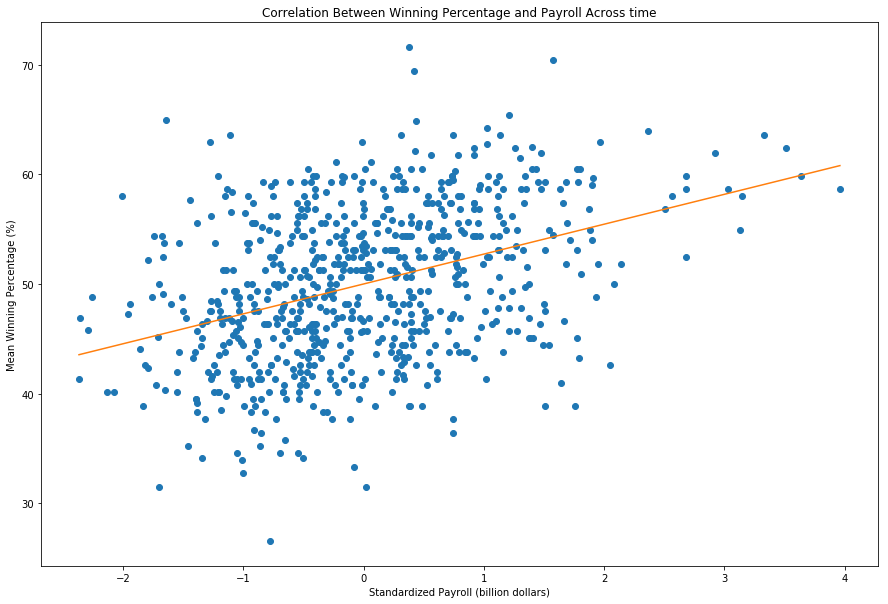

In [864]:
# Make a copy of the payroll table
std = payroll.copy()

# Extract the year, team and winning percentage from the first table
win_rate = pd.DataFrame(columns = ['yearID', 'win_percentage'])
win_rate['yearID'] = join['yearID']
win_rate['teamID'] = join['teamID']
win_rate['win_percentage'] = join['win_percentage']

# Merge the two tables together so the transformed payroll data and the winning percentage data are in one table
std_win = std.merge(win_rate, how = 'inner', left_on = ['yearID', 'teamID'], right_on = ['yearID', 'teamID'])

x_vals = std_win['std_payroll'].values
y_vals = std_win['win_percentage'].values

# Make the plot
z = np.polyfit(x = x_vals, y = y_vals, deg=1)
f = np.poly1d(z)
x_new = np.linspace(x_vals.min(), x_vals.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(15,10))
plt.plot(x_vals, y_vals,'o', x_new, y_new)
    
plt.title("Correlation Between Winning Percentage and Payroll Across time")
plt.xlabel("Standardized Payroll (billion dollars)")
plt.ylabel("Mean Winning Percentage (%)")
plt.show()

### Problem 8
Create a new field to compute each team's spending effiency, with the spending efficiency of each team in each year defined as the winning percentage of each team in each year subtracted by the expected winning percentage of each team in each year. Make a line plot with year on the x-axis and efficiency on the y-axis. The set of teams being plotted are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (OAK, BOS, NYA, ATL, TBA).

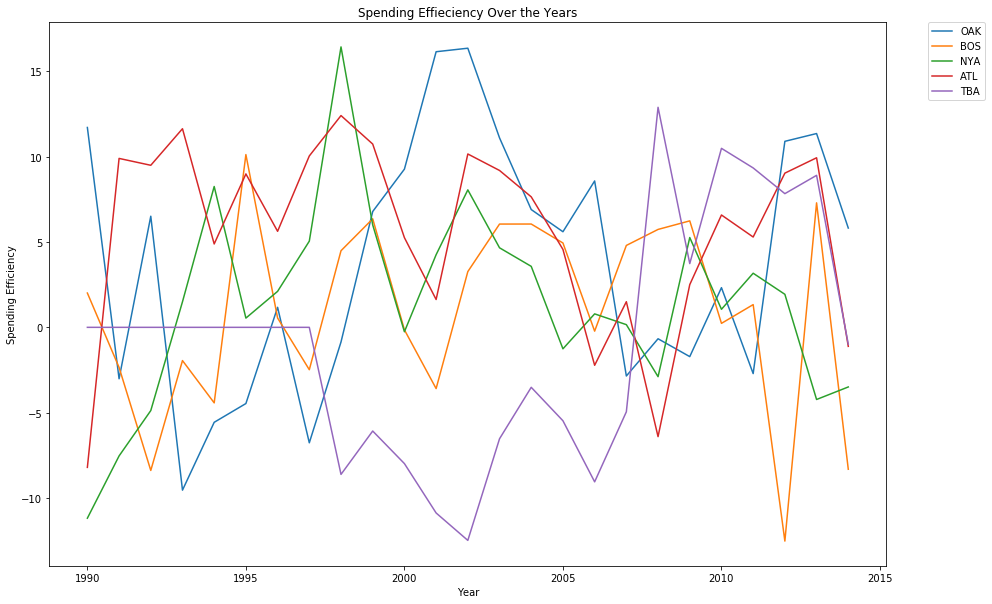

In [868]:
# Compute the spending efficiency
std_win['expected_win'] = std_win['std_payroll'] * 2.5 + 50
std_win['efficiency'] = std_win['win_percentage'] - std_win['expected_win']

# Create a data frame of years and an empty hash
years = np.arange(1990, 2015)
years_table = pd.DataFrame(columns = ['yearID'], data = years)
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
d = {}

# Make the plot
plt.figure(figsize=(15,10))
plt.title("Spending Effieciency Over the Years")
plt.xlabel("Year")
plt.ylabel("Spending Efficiency")

# For every team in the array:
for t in teams:
    
    # Extract the current team data from the entire table
    plot_table = std_win.drop(std_win[t != std_win['teamID']].index)
    
    # Extract the relevant data for the current team
    relation = std_win[['yearID','teamID','efficiency']].groupby(['teamID']).get_group(t)

    # Merge the years table with the extracted data
    d[t] = years_table.merge(relation, how = 'left', left_on = ['yearID'], right_on = ['yearID'])
    
    # Plot each team's data over the years as a line and label each line with the corresponding team name
    plt.plot(d[t]['yearID'], d[t]['efficiency'].fillna(value = 0), label = t)
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    
plt.show()

### Question 4
From this plot we learned that Oakland A's spending efficiency is not as good as it looks as our conlcusions in question 2 and 3. Oakland A's spending efficiency peaked around the Moneyball period (2002), but it fluctuates throughout the rest of the years, just like other teams do. The reason for such fluctuation lies in the way we define the spending efficiency, which is how much the winning percentage per team per year deviates from the expected winning percentage per team per year. We can visualize the expected winning percentage in problem 7 and it is not hard to tell that they are all over the place, which leads to the drastic fluctutation of each line in problem 8. Hence, to make any concrete conclusion about the spending efficiency of any team, we need to take more aspects into considerations, such as how we define the spending efficiency itself and considering the actuall effect of the money spent, which could take years to have a full impact on the team performance.